# Copy items-Copy1.csv file into pandas dataframe and 
# replace all fields that are empty with NaN

In [95]:
import pandas as pd
import numpy as np

# read dataset into pandas dataframe
df_items = pd.read_csv('items-Copy1.csv')

# replace field that's entirely space (or empty) with NaN
df_items = df_items.replace(np.nan, '', regex=True)

In [96]:
df_items['description']

0       Black American racial experience is real. We s...
1       The best costume for Halloween worth posting. ...
2       Keep on whining and crying for your president,...
3       End the whining and crying, end the riots with...
4       Black girls are the definition of national gre...
                              ...                        
3007                      New ideas, old values. Like us!
3008    Secured borders are a national priority. We ne...
3009    Secured borders should be a top priority. We n...
3010                                Bernie for president!
3011    Secured borders are a national priority. Ameri...
Name: description, Length: 3012, dtype: object

# Go through all rows in dataframe and check for if 
1. anger and not fear is in tags
2. fear and not anger is in tags
3. anger and fear are both in tags
4. neither anger or fear are in tags

In [97]:
labels_list_word = [] # holds list of labels in word form
labels_list_numerical = [] # holds list of labels in numerical form
descriptions_list = [] # holds list of descriptions

for i, row in df_items.iterrows():
    row['tag'] = row['tag'].lower()
    if 'anger' in row['tag'] and not 'fear' in row['tag']:
        labels_list_word.append('anger') # anger
        descriptions_list.append(row['description'])
        labels_list_numerical.append(0) # 0
    elif not 'anger' in row['tag'] and 'fear' in row['tag']:
        labels_list_word.append('fear') # fear
        descriptions_list.append(row['description'])
        labels_list_numerical.append(1) # 1
    elif 'anger' in row['tag'] and 'fear' in row['tag']:
        labels_list_word.append('both') # both
        descriptions_list.append(row['description'])
        labels_list_numerical.append(2) # 2
    else:
        labels_list_word.append('neither') # neither
        descriptions_list.append(row['description'])
        labels_list_numerical.append(3) # 3

df = pd.DataFrame() # create empty dataframe
df['label word'] = labels_list_word # append labels_list_word to df with column header 'label word'
df['label numerical'] = labels_list_numerical # append labels_list_numerical to df with column header 'label numerical'
df['description'] = descriptions_list # append descriptions_list to df with column header 'description'
df.loc[df['label numerical'] != 0]

,label word,label numerical,description
0,fear,1,Black American racial experience is real. We s...
4,neither,3,Black girls are the definition of national gre...
5,neither,3,"Imma stay here comfy and untouched, yet workin..."
6,neither,3,There is a disgusting video Circulating on the...
10,neither,3,Unapologetically melaneted Kings and Queens ar...
...,...,...,...
3007,neither,3,"New ideas, old values. Like us!"
3008,neither,3,Secured borders are a national priority. We ne...
3009,neither,3,Secured borders should be a top priority. We n...
3010,neither,3,Bernie for president!


# Go through all rows in dataframe and check for if
1. anger is in tags
2. anger is not in tags

## This is a binary classification task

In [98]:
labels_list_word = [] # holds list of labels in word form
labels_list_numerical = [] # holds list of labels in numerical form
descriptions_list = [] # holds list of descriptions

# binary classification so either anger or not
for i, row in df_items.iterrows():
    row['tag'] = row['tag'].lower() # convert tags to lowercase
    if 'anger' in row['tag']:
        labels_list_word.append('anger') # anger
        descriptions_list.append(row['description']) # add description
        labels_list_numerical.append(1) # 1
    else:
        labels_list_word.append('none') # not anger
        descriptions_list.append(row['description']) # add description
        labels_list_numerical.append(0) # 0

df_anger = pd.DataFrame() # create empty dataframe
df_anger['label word'] = labels_list_word # append labels_list_word to df with column header 'label word'
df_anger['label numerical'] = labels_list_numerical # append labels_list_numerical to df with column header 'label numerical'
df_anger['description'] = descriptions_list # append descriptions_list to df with column header 'description'
df_anger.loc[df_anger['label word'] == 'anger']

,label word,label numerical,description
1,anger,1,The best costume for Halloween worth posting. ...
2,anger,1,"Keep on whining and crying for your president,..."
3,anger,1,"End the whining and crying, end the riots with..."
7,anger,1,Art imitates life art. This photo is great.
8,anger,1,"In America, racial oppression and racism were ..."
...,...,...,...
2964,anger,1,Officials of the Highlands High School are inv...
2976,anger,1,"Protect the 2nd. Without it, you won't have an..."
2989,anger,1,"Protect the 2nd. Without it, you won't have an..."
2995,anger,1,"Remember folks, dance and music is a large par..."


# Go through all rows in dataframe and check for if
1. fear is in tags
2. fear is not in tags

## This is a binary classification task

In [99]:
labels_list_word = [] # holds list of labels in word form
labels_list_numerical = [] # holds list of labels in numerical form
descriptions_list = [] # holds list of descriptions

# binary classification so either fear or not
for i, row in df_items.iterrows():
    row['tag'] = row['tag'].lower() # convert tags to lowercase
    if 'fear' in row['tag']:
        labels_list_word.append('fear') # fear
        descriptions_list.append(row['description']) # add description
        labels_list_numerical.append(1) # 1
    else:
        labels_list_word.append('none') # not anger
        descriptions_list.append(row['description']) # add description
        labels_list_numerical.append(0) # 0

df_fear = pd.DataFrame() # create empty dataframe
df_fear['label word'] = labels_list_word # append labels_list_word to df with column header 'label word'
df_fear['label numerical'] = labels_list_numerical # append labels_list_numerical to df with column header 'label numerical'
df_fear['description'] = descriptions_list # append descriptions_list to df with column header 'description'
df_fear.loc[df_fear['label word'] == 'fear']

,label word,label numerical,description
0,fear,1,Black American racial experience is real. We s...
11,fear,1,Watch this heart-piercing story about a racial...
15,fear,1,People are genuinely scared for their futures!...
23,fear,1,"For years, white supremacists in the Dothan, A..."
25,fear,1,The cop beat this man like he was a runaway sl...
...,...,...,...
2973,fear,1,Give your online shopping a fresh start with t...
2976,fear,1,"Protect the 2nd. Without it, you won't have an..."
2987,fear,1,People really need to understand
2989,fear,1,"Protect the 2nd. Without it, you won't have an..."


# Go through all rows in dataframe and check for if
1. anger and fear are both in tags
2. neither are in the tags

## This is a binary classification task

In [100]:
labels_list_word = [] # holds list of labels in word form
labels_list_numerical = [] # holds list of labels in numerical form
descriptions_list = [] # holds list of descriptions

# binary classification so either fear or not
for i, row in df_items.iterrows():
    row['tag'] = row['tag'].lower() # convert tags to lowercase
    if 'fear' in row['tag'] and 'anger' in row['tag']:
        labels_list_word.append('both') # both
        descriptions_list.append(row['description']) # add description
        labels_list_numerical.append(1) # 1
    else:
        labels_list_word.append('none') # neither
        descriptions_list.append(row['description']) # add description
        labels_list_numerical.append(0) # 0

df_both = pd.DataFrame() # create empty dataframe
df_both['label word'] = labels_list_word # append labels_list_word to df with column header 'label word'
df_both['label numerical'] = labels_list_numerical # append labels_list_numerical to df with column header 'label numerical'
df_both['description'] = descriptions_list # append descriptions_list to df with column header 'description'
df_both.loc[df_both['label word'] == 'both']

,label word,label numerical,description
15,both,1,People are genuinely scared for their futures!...
23,both,1,"For years, white supremacists in the Dothan, A..."
25,both,1,The cop beat this man like he was a runaway sl...
40,both,1,There is a disgusting video Circulating on the...
41,both,1,Black American racial experience is real. We s...
...,...,...,...
2930,both,1,Black Matters. Black community.
2954,both,1,Fast-growing black community. Latest news and ...
2964,both,1,Officials of the Highlands High School are inv...
2976,both,1,"Protect the 2nd. Without it, you won't have an..."


# Create train test split for classification for anger or not anger

In [101]:
from sklearn.model_selection import train_test_split

X_train_anger, X_test_anger, Y_train_anger, Y_test_anger = train_test_split(df_anger['description'], 
                                                                            df_anger['label numerical'], 
                                                                            random_state=1)

print('Number of rows in the total set for anger: {}'.format(df_anger.shape[0]))
print('Number of rows in the training set for anger: {}'.format(X_train_anger.shape[0]))
print('Number of rows in the test set for anger: {}'.format(X_test_anger.shape[0]))

Number of rows in the total set for anger: 3012
Number of rows in the training set for anger: 2259
Number of rows in the test set for anger: 753


# Create an instance of CountVectorizer
# Fit training data and return matrix
# transform testing data and return matrix

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate Countvectorizer method
count_vector_anger = CountVectorizer()

# fit training data and return matrix
training_data_anger = count_vector_anger.fit_transform(X_train_anger)

# transform testing data and return matrix
testing_data_anger = count_vector_anger.transform(X_test_anger)

# Utilize MultinomialNB from sklearn to create a naive bayes classifier and form predictions

In [103]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes_anger = MultinomialNB()
naive_bayes_anger.fit(training_data_anger, Y_train_anger)

predictions_anger = naive_bayes_anger.predict(testing_data_anger)

In [104]:
!pip3 install matplotlib==3.1.0 # use this version of matplotlib as other version causes problems with seaborn

# Print out classification report for anger vs not anger

Classification report for anger classification: 
---------------------------------------------------------- 
              precision    recall  f1-score   support

       anger       0.83      0.85      0.84       548
        none       0.58      0.54      0.56       205

    accuracy                           0.77       753
   macro avg       0.71      0.70      0.70       753
weighted avg       0.76      0.77      0.76       753

---------------------------------------------------------- 
Accuracy score:  0.7675962815405046
Precision score:  0.5365853658536586
Recall score:  0.5789473684210527
F1 score:  0.5569620253164557
---------------------------------------------------------- 
Confusion matrix anger: 

[[468  80]
 [ 95 110]]


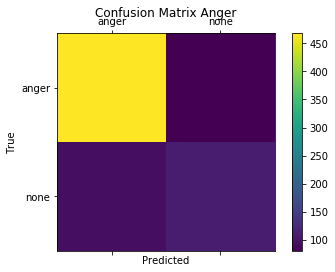

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

print('Classification report for anger classification: ')
print('---------------------------------------------------------- ')
print(classification_report(Y_test_anger, predictions_anger, target_names = ['anger', 'none']))
print('---------------------------------------------------------- ')
print('Accuracy score: ', format(accuracy_score(predictions_anger, Y_test_anger)))
print('Precision score: ', format(precision_score(predictions_anger, Y_test_anger)))
print('Recall score: ', format(recall_score(predictions_anger, Y_test_anger)))
print('F1 score: ', format(f1_score(predictions_anger, Y_test_anger)))
print('---------------------------------------------------------- ')

labels = ['anger', 'none']
cm = confusion_matrix(list(Y_test_anger), predictions_anger)
print("Confusion matrix anger: \n")
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix Anger')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_anger.png')
plt.show()

# Create train test split for classification for fear or not fear

In [106]:
from sklearn.model_selection import train_test_split

X_train_fear, X_test_fear, Y_train_fear, Y_test_fear = train_test_split(df_fear['description'], 
                                                                            df_fear['label numerical'], 
                                                                            random_state=1)

print('Number of rows in the total set for fear: {}'.format(df_fear.shape[0]))
print('Number of rows in the training set for fear: {}'.format(X_train_fear.shape[0]))
print('Number of rows in the test set for fear: {}'.format(X_test_fear.shape[0]))

Number of rows in the total set for fear: 3012
Number of rows in the training set for fear: 2259
Number of rows in the test set for fear: 753


# Create an instance of CountVectorizer
# Fit training data and return matrix
# transform testing data and return matrix

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate Countvectorizer method
count_vector_fear = CountVectorizer()

# fit training data and return matrix
training_data_fear = count_vector_fear.fit_transform(X_train_fear)

# transform testing data and return matrix
testing_data_fear = count_vector_fear.transform(X_test_fear)

# Utilize MultinomialNB from sklearn to create a naive bayes classifier and form predictions

In [108]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes_fear = MultinomialNB()
naive_bayes_fear.fit(training_data_fear, Y_train_fear)

predictions_fear = naive_bayes_fear.predict(testing_data_fear)

# Print out classification report for fear vs not fear

Classification report for fear classification: 
---------------------------------------------------------- 
              precision    recall  f1-score   support

        fear       0.92      0.98      0.95       675
        none       0.55      0.23      0.32        78

    accuracy                           0.90       753
   macro avg       0.73      0.60      0.64       753
weighted avg       0.88      0.90      0.88       753

---------------------------------------------------------- 
Accuracy score:  0.900398406374502
Precision score:  0.23076923076923078
Recall score:  0.5454545454545454
F1 score:  0.3243243243243243
---------------------------------------------------------- 
Confusion matrix fear: 

[[660  15]
 [ 60  18]]


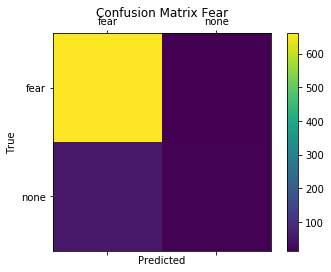

In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

print('Classification report for fear classification: ')
print('---------------------------------------------------------- ')
print(classification_report(Y_test_fear, predictions_fear, target_names = ['fear', 'none']))
print('---------------------------------------------------------- ')
print('Accuracy score: ', format(accuracy_score(predictions_fear, Y_test_fear)))
print('Precision score: ', format(precision_score(predictions_fear, Y_test_fear)))
print('Recall score: ', format(recall_score(predictions_fear, Y_test_fear)))
print('F1 score: ', format(f1_score(predictions_fear, Y_test_fear)))
print('---------------------------------------------------------- ')

labels = ['fear', 'none']
cm = confusion_matrix(list(Y_test_fear), predictions_fear)
print("Confusion matrix fear: \n")
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix Fear')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_fear.png')
plt.show()

# Create train test split for classification for both or not both

In [110]:
from sklearn.model_selection import train_test_split

X_train_both, X_test_both, Y_train_both, Y_test_both = train_test_split(df_both['description'], 
                                                                            df_both['label numerical'], 
                                                                            random_state=1)

print('Number of rows in the total set for both: {}'.format(df_both.shape[0]))
print('Number of rows in the training set for both: {}'.format(X_train_both.shape[0]))
print('Number of rows in the test set for both: {}'.format(X_test_both.shape[0]))

Number of rows in the total set for both: 3012
Number of rows in the training set for both: 2259
Number of rows in the test set for both: 753


# Create an instance of CountVectorizer
# Fit training data and return matrix
# transform testing data and return matrix

In [111]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate Countvectorizer method
count_vector_both = CountVectorizer()

# fit training data and return matrix
training_data_both = count_vector_both.fit_transform(X_train_both)

# transform testing data and return matrix
testing_data_both = count_vector_both.transform(X_test_both)

# Utilize MultinomialNB from sklearn to create a naive bayes classifier and form predictions

In [112]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes_both = MultinomialNB()
naive_bayes_both.fit(training_data_both, Y_train_both)

predictions_both = naive_bayes_both.predict(testing_data_both)

# Print out classification report for both vs not both

Classification report for both classification: 
---------------------------------------------------------- 
              precision    recall  f1-score   support

        both       0.95      0.99      0.97       707
        none       0.55      0.24      0.33        46

    accuracy                           0.94       753
   macro avg       0.75      0.61      0.65       753
weighted avg       0.93      0.94      0.93       753

---------------------------------------------------------- 
Accuracy score:  0.9415670650730412
Precision score:  0.2391304347826087
Recall score:  0.55
F1 score:  0.33333333333333337
---------------------------------------------------------- 
Confusion matrix both: 

[[698   9]
 [ 35  11]]


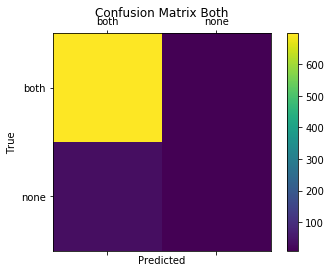

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

print('Classification report for both classification: ')
print('---------------------------------------------------------- ')
print(classification_report(Y_test_both, predictions_both, target_names = ['both', 'none']))
print('---------------------------------------------------------- ')
print('Accuracy score: ', format(accuracy_score(predictions_both, Y_test_both)))
print('Precision score: ', format(precision_score(predictions_both, Y_test_both)))
print('Recall score: ', format(recall_score(predictions_both, Y_test_both)))
print('F1 score: ', format(f1_score(predictions_both, Y_test_both)))
print('---------------------------------------------------------- ')

labels = ['both', 'none']
cm = confusion_matrix(list(Y_test_both), predictions_both)
print("Confusion matrix both: \n")
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix Both')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_both.png')
plt.show()

# Sensitivity measures the proportion of actual positives that are correctly identified as such. In probability notation: P(T+|D+) = TP / (TP+FN).

# Specificity measures the proportion of actual negatives that are correctly identified as such. In probability notation: P(T-|D-) = TN / (TN + FP).

In [114]:
def perf_measure(y_actual, y_hat):
    '''
    Description:
        Takes in ground truth and predicted values and through a series
        of comparisons determines the number of True Positives (TP), False
        Positives (FP), True Negatives (TN), False Negatives (FN) and 
        returns these values in a tuple.
    Input:
        y_actual: Actual values of y set
        y_hat: Predicted values of y set
    Output:
        (TP, FP, TN, FN): Tuple of performance measures
    '''
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    # Go through all values
    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1: # True Positive
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]: # False Positive
           FP += 1
        if y_actual[i]==y_hat[i]==0: # True Negative
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]: # False Negative
           FN += 1

    return(TP, FP, TN, FN)

In [115]:
TP_anger, FP_anger, TN_anger, FN_anger = perf_measure(list(Y_test_anger), list(predictions_anger))
sensitivity_anger = TP_anger / (TP_anger+FN_anger)
specificity_anger = TN_anger / (TN_anger + FP_anger)
print("Sensitivity Measure for Anger Classification: {sensitivity_anger}".format(sensitivity_anger=str(sensitivity_anger)))
print("Specificity Measure for Anger Classification: {specificity_anger}".format(specificity_anger=str(specificity_anger)))

Sensitivity Measure for Anger Classification: 0.5365853658536586
Specificity Measure for Anger Classification: 0.8540145985401459


In [116]:
TP_fear, FP_fear, TN_fear, FN_fear = perf_measure(list(Y_test_fear), list(predictions_fear))
sensitivity_fear = TP_fear / (TP_fear+FN_fear)
specificity_fear = TN_fear / (TN_fear + FP_fear)
print("Sensitivity Measure for Fear Classification: {sensitivity_fear}".format(sensitivity_fear=str(sensitivity_fear)))
print("Specificity Measure for Fear Classification: {specificity_fear}".format(specificity_fear=str(specificity_fear)))

Sensitivity Measure for Fear Classification: 0.23076923076923078
Specificity Measure for Fear Classification: 0.9777777777777777


In [117]:
TP_both, FP_both, TN_both, FN_both = perf_measure(list(Y_test_both), list(predictions_both))
sensitivity_both = TP_both / (TP_both+FN_both)
specificity_both = TN_both / (TN_both + FP_both)
print("Sensitivity Measure for Both Classification: {sensitivity_both}".format(sensitivity_both=str(sensitivity_both)))
print("Specificity Measure for Both Classification: {specificity_both}".format(specificity_both=str(specificity_both)))

Sensitivity Measure for Both Classification: 0.2391304347826087
Specificity Measure for Both Classification: 0.9872701555869873
